# The evolution of diversity in film industry 

### Applied Data Analysis CS-401- team MicrobiotaAndCo, EPFL


## 1. Preprocessing

In [1]:
# Formating the orignal datatset
from src.scripts.formating import formating_datasets
import pandas as pd

# Running the formating of the original dataset
formating_datasets()
# To add headers and convert the datasets in csv 

c:\Users\antea\OneDrive\EPFL_official\MASTER_NEUROX\MA3\ADA\MicrobiotaAndCo\ada-2024-project-microbiotaandco
The character metadata is formated.
The movie metadata is formated.
The name cluster is formated.
The plot summaries is metadata is formated.
The TV tropes clusters is formated.


In [2]:
# Prepocessing
from src.scripts.preprocessing import preprocessing_datasets

preprocessing_datasets()

c:\Users\antea\OneDrive\EPFL_official\MASTER_NEUROX\MA3\ADA\MicrobiotaAndCo\ada-2024-project-microbiotaandco
Creation of the compact dataset...
done.
Creation of the exploded dataset...
done.


## 2. Exploratory Data Analysis

Actor Gender
M    16317
F     8084
Name: count, dtype: int64


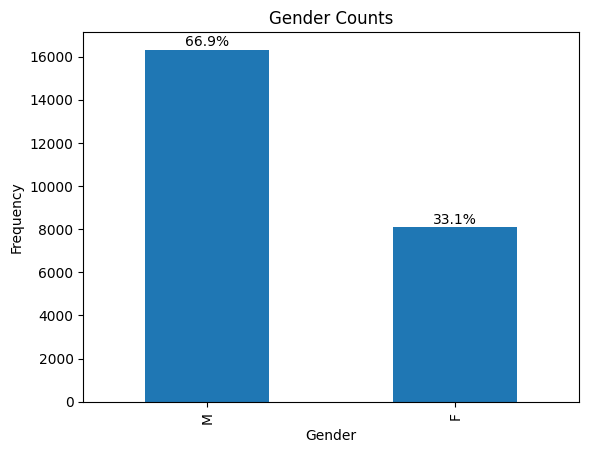

ConversionError: Failed to convert value(s) to axis units: 'M'

<Figure size 1000x600 with 1 Axes>

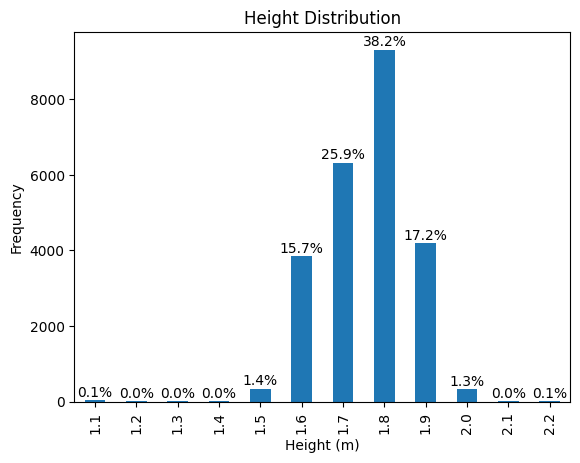

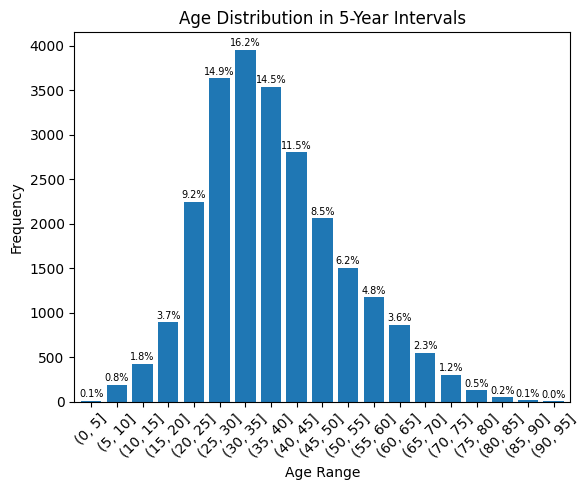

                    Count
Ethnicity                
African Americans    3267
Italians              166
European Americans   8372
Taiwanese               8
Jewish               3210
...                   ...
African Guyanese        1
Singapourians           1
Bosnians                1
Cubans                  1
Haitian Americans       1

[131 rows x 1 columns]


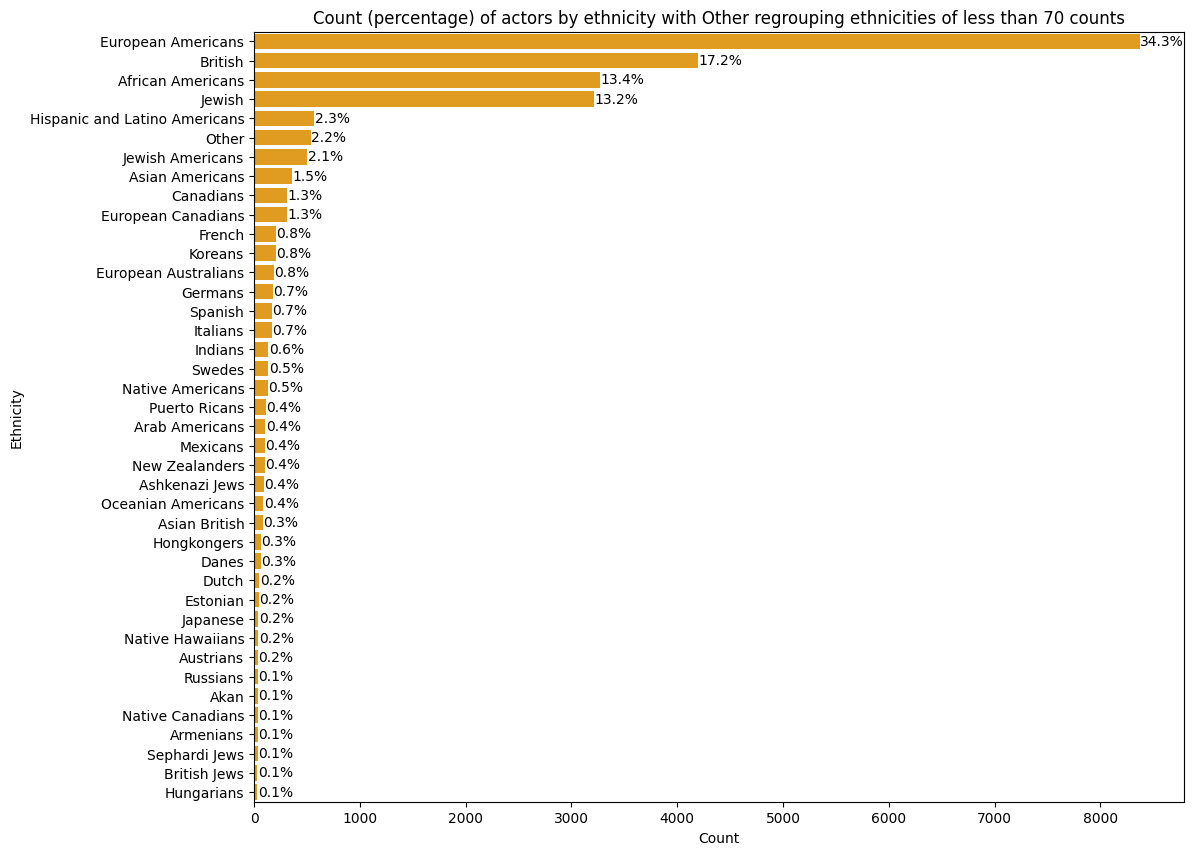

                          Count
Country                        
United States of America  13307
Italy                       170
Taiwan                        8
Jewish                     3201
Korea                       203
...                         ...
Greeland                     10
China                         1
Guyana                        1
Bosnia                        1
Cuban                         1

[112 rows x 1 columns]


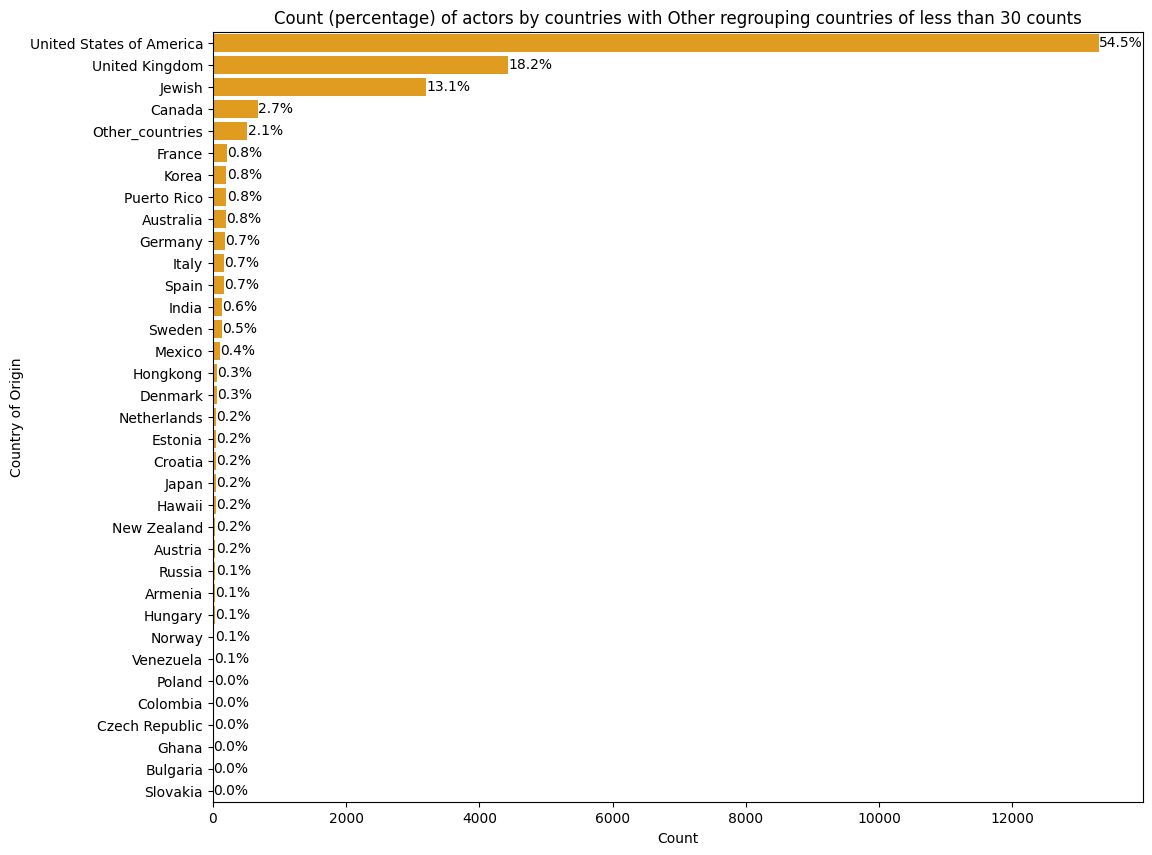

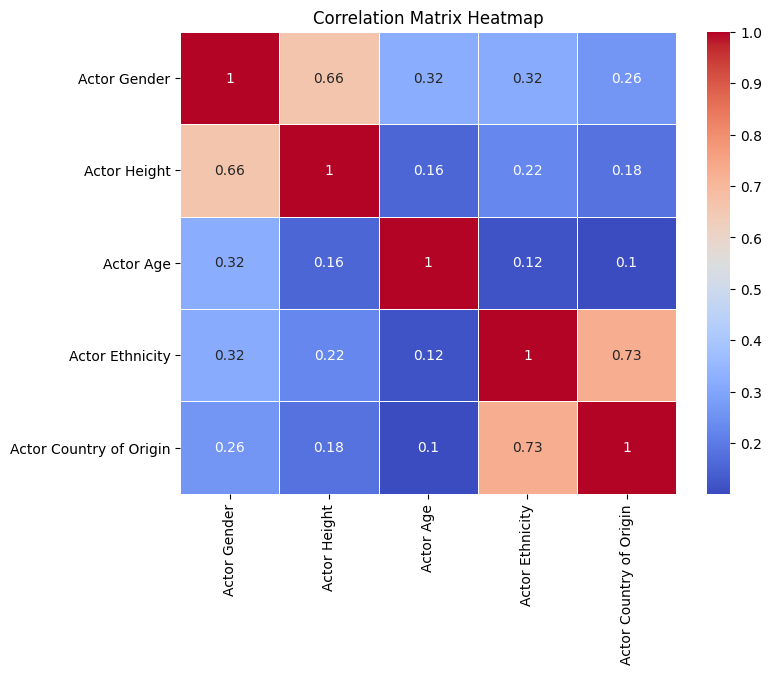

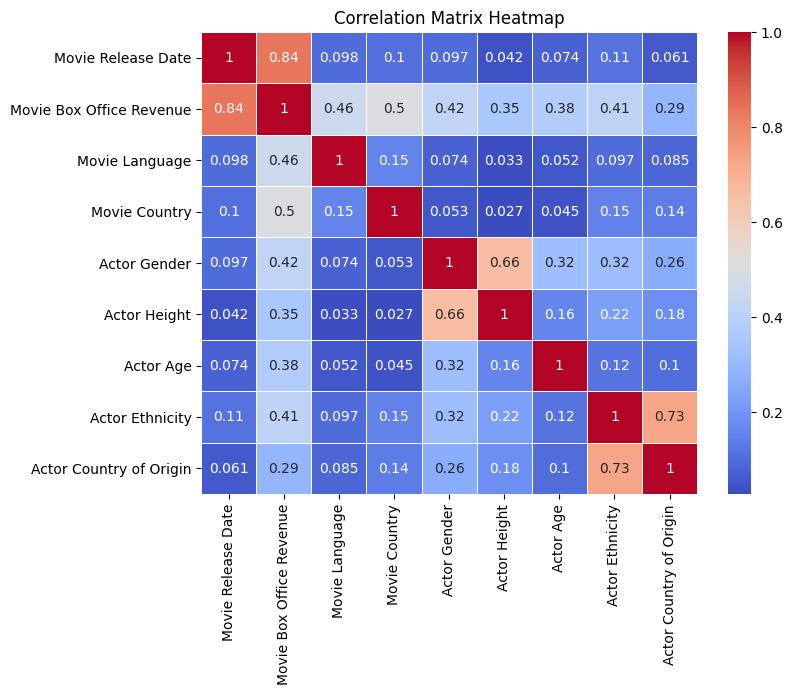

In [3]:
import src.scripts.preliminary_analysis_2

## 3. Data Analysis

### 3.1. Results for the diversity analysis

In [4]:
#ensure that the geopandas library is installed

!pip install geopandas

from src.scripts import maps

AttributeError: module 'fiona' has no attribute 'path'

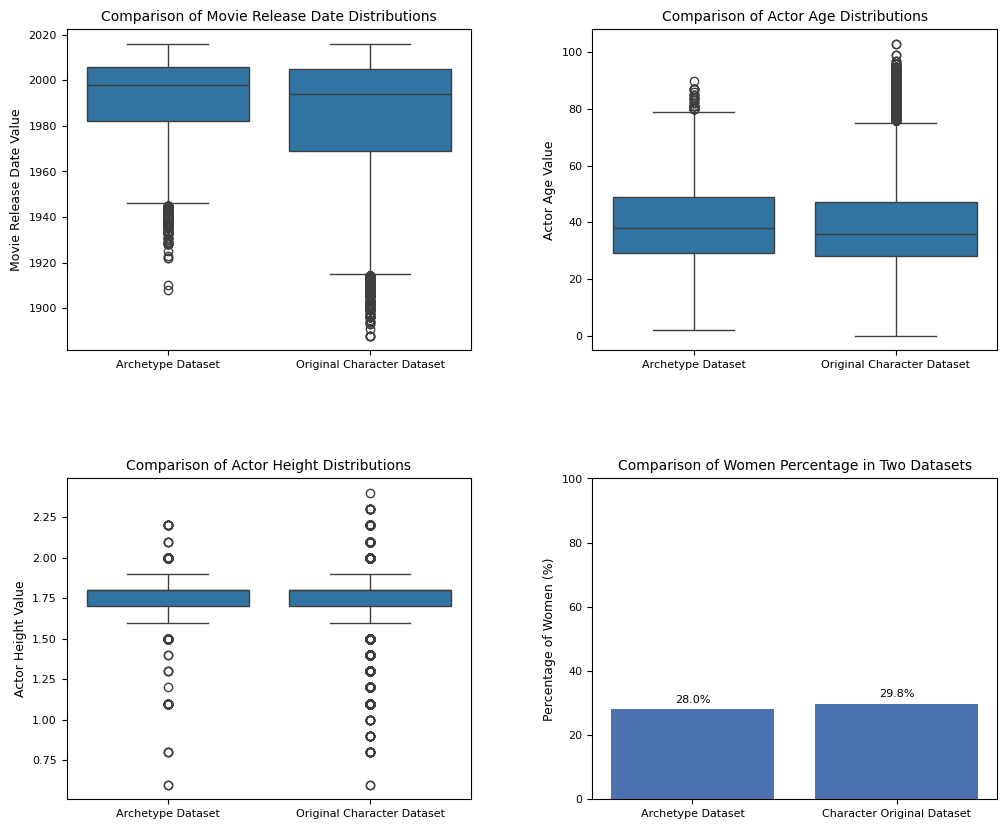

In [4]:
import src.scripts.plot_data_comparison

Results of the archetype analysis:

In [8]:
#import src.scripts.archetype_analysis

In this section, we observe the diversity scores over time (averaged by year) and the average scores of each countries in order to find which are the trends across time and space

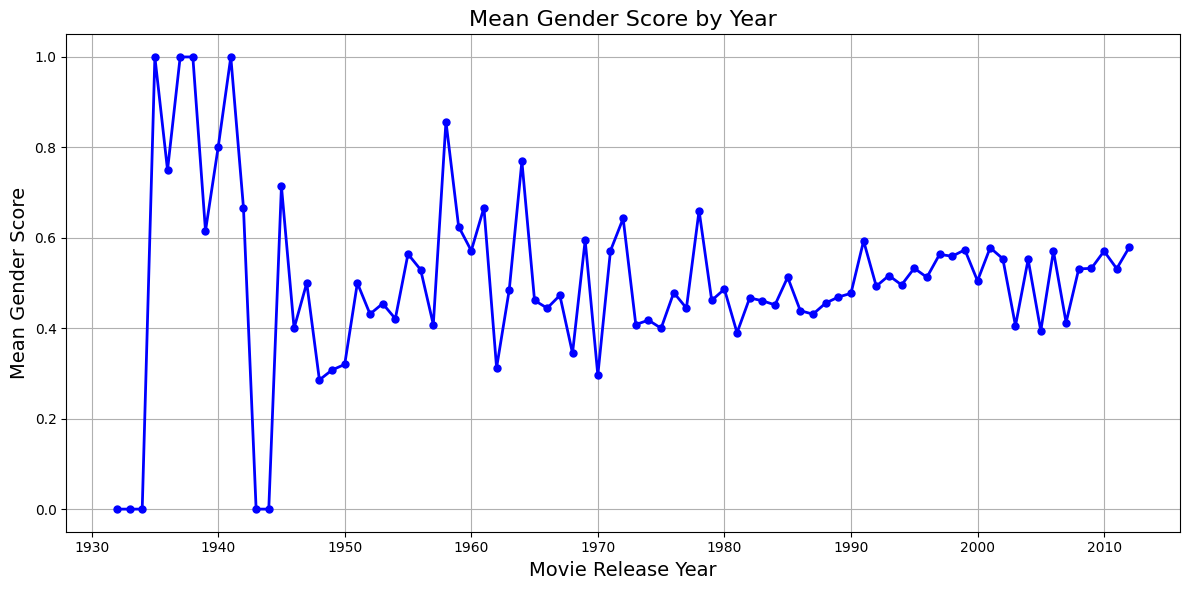

here we plot the me


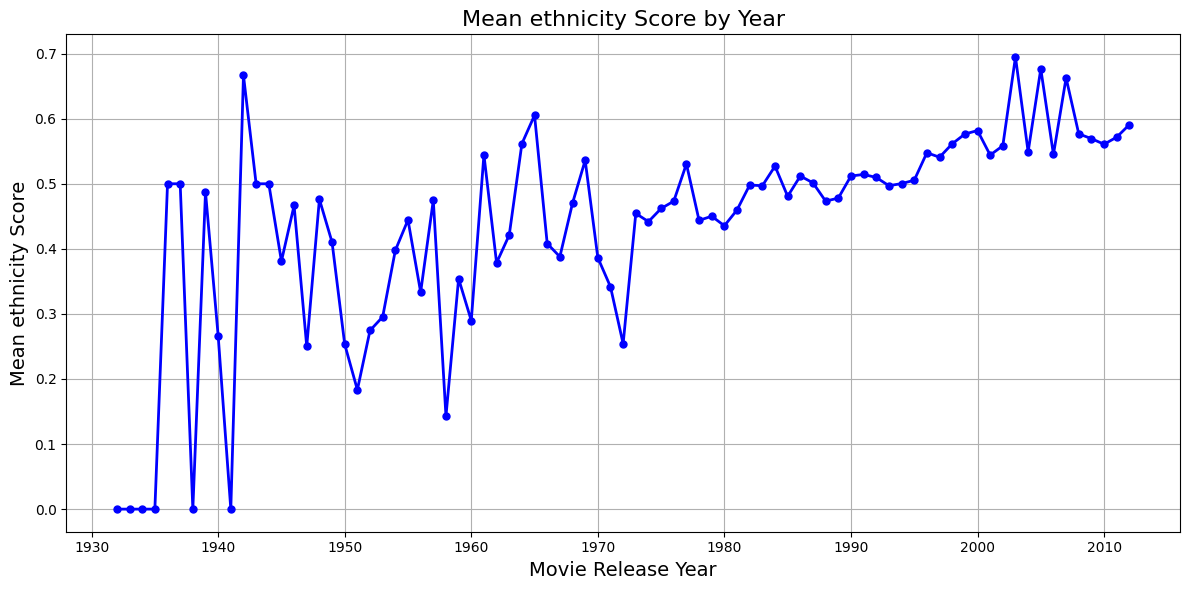

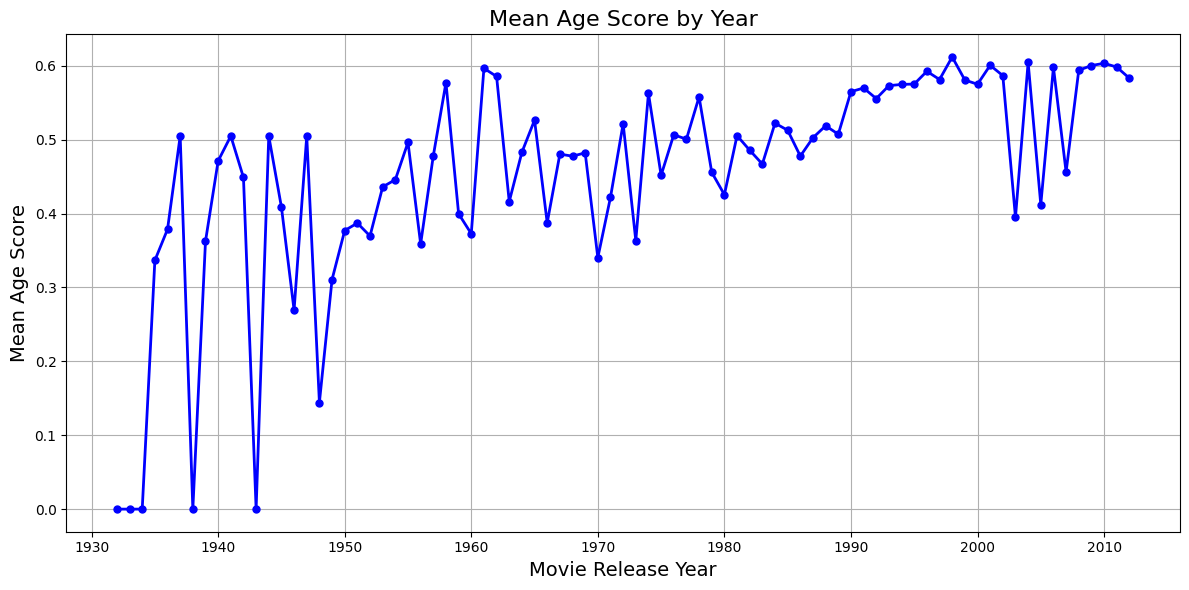

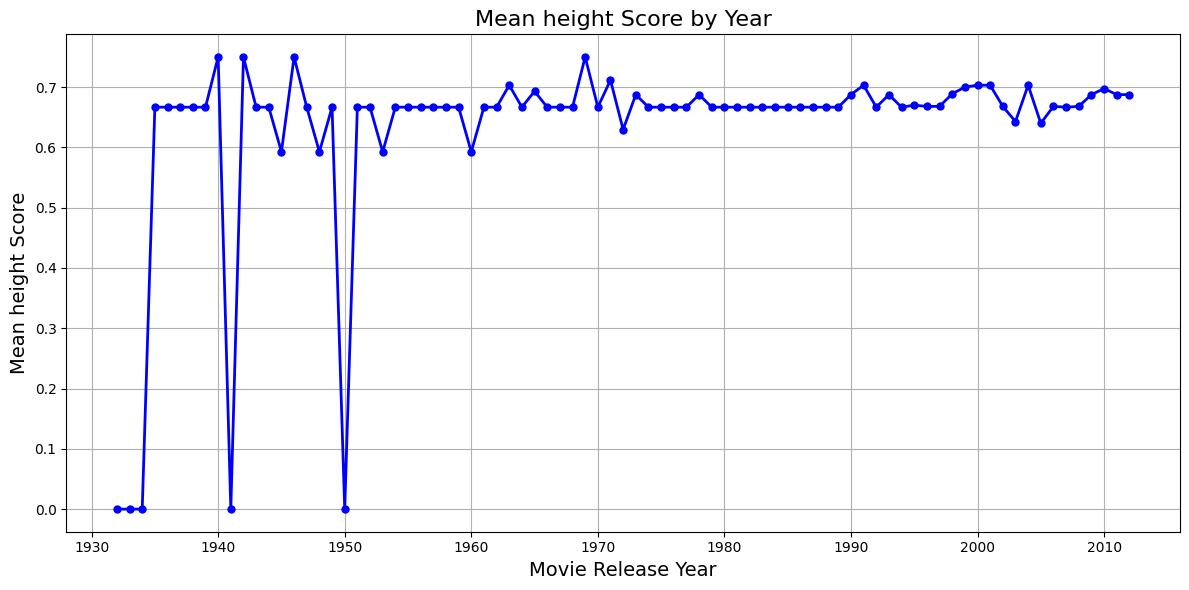

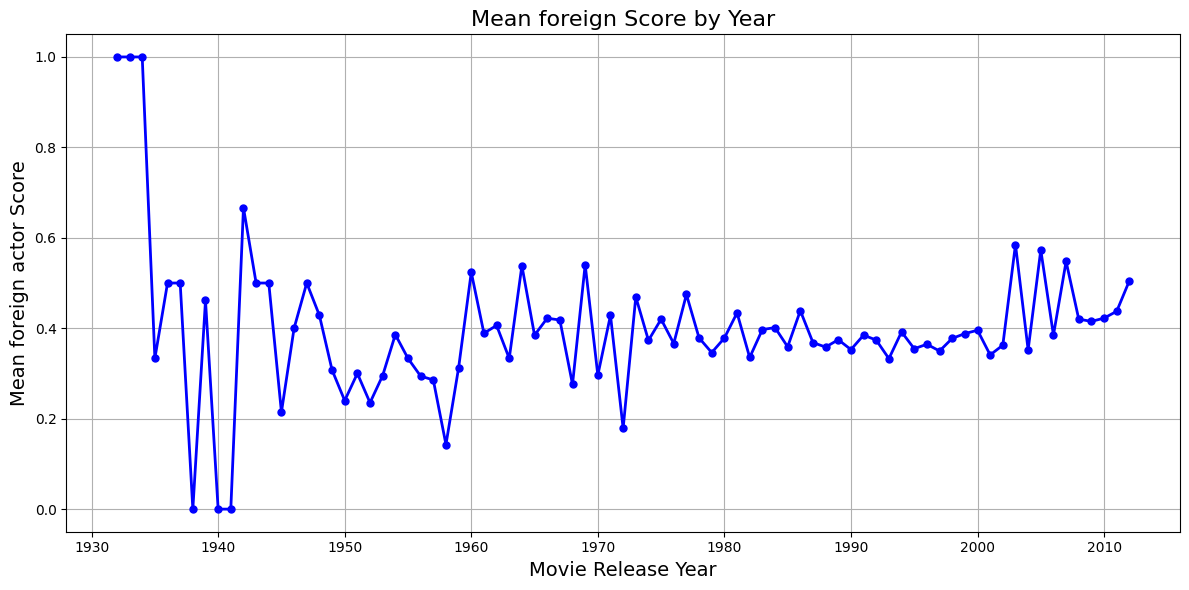

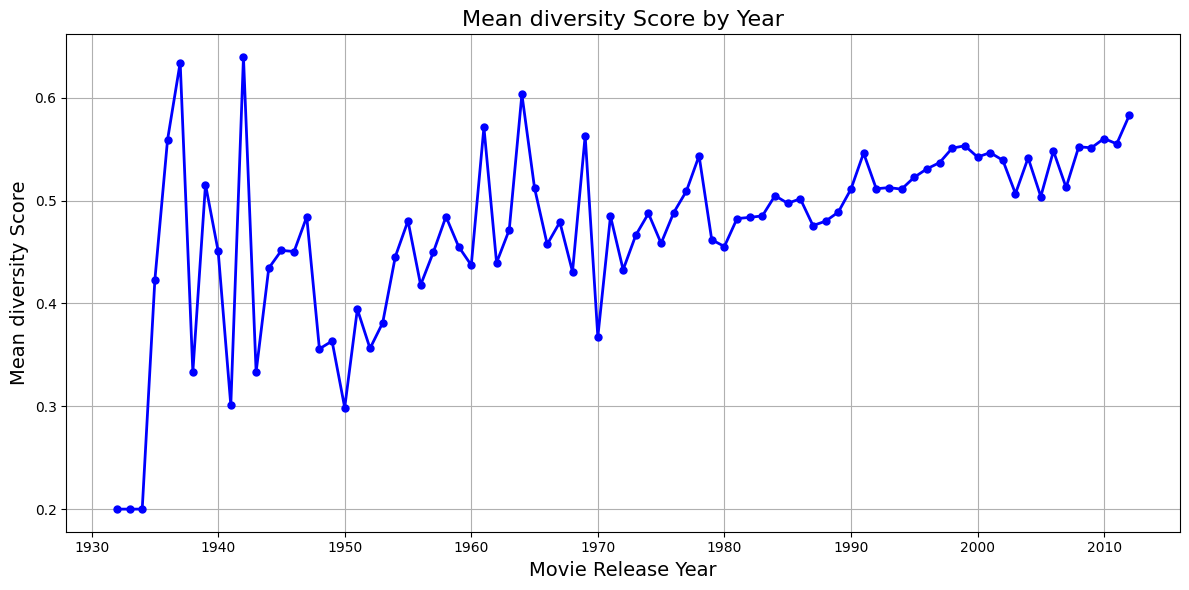

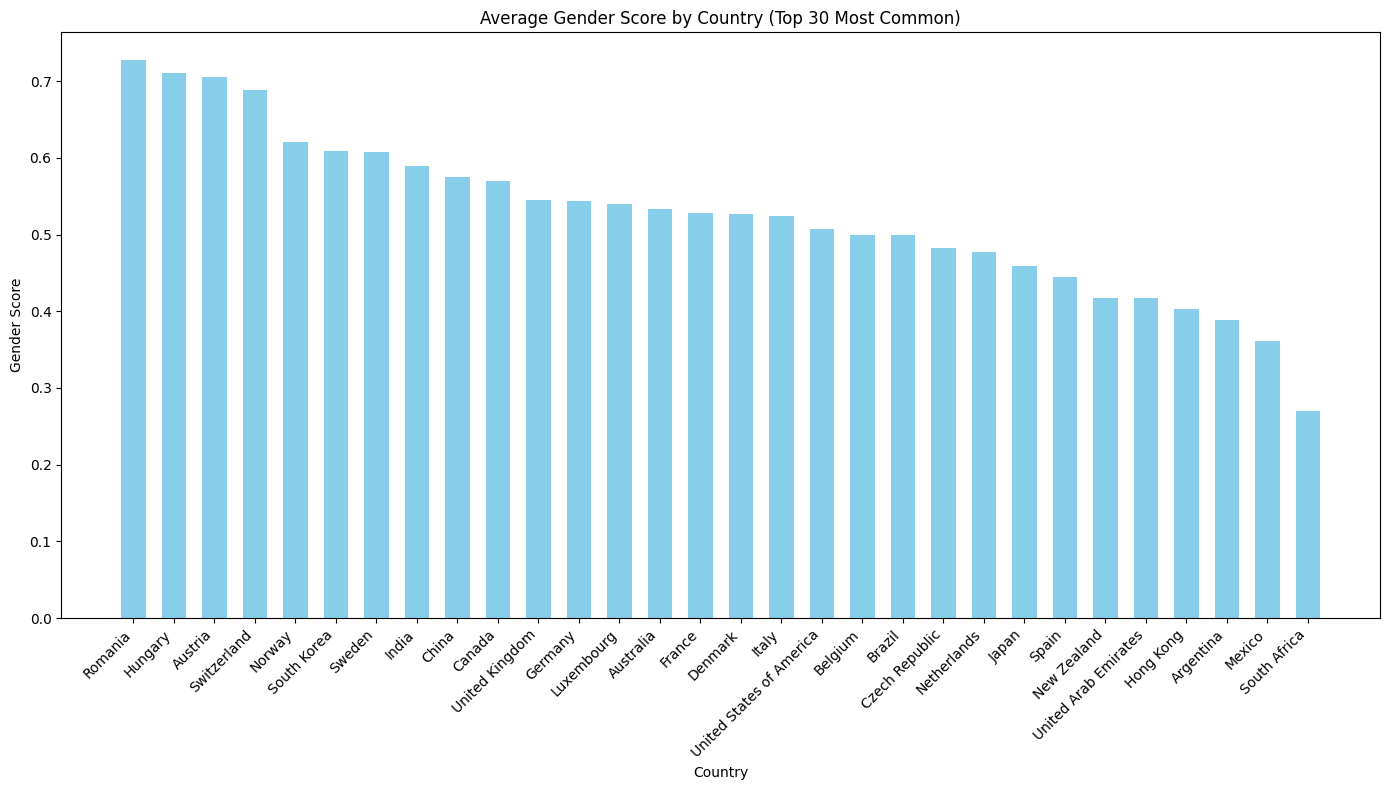

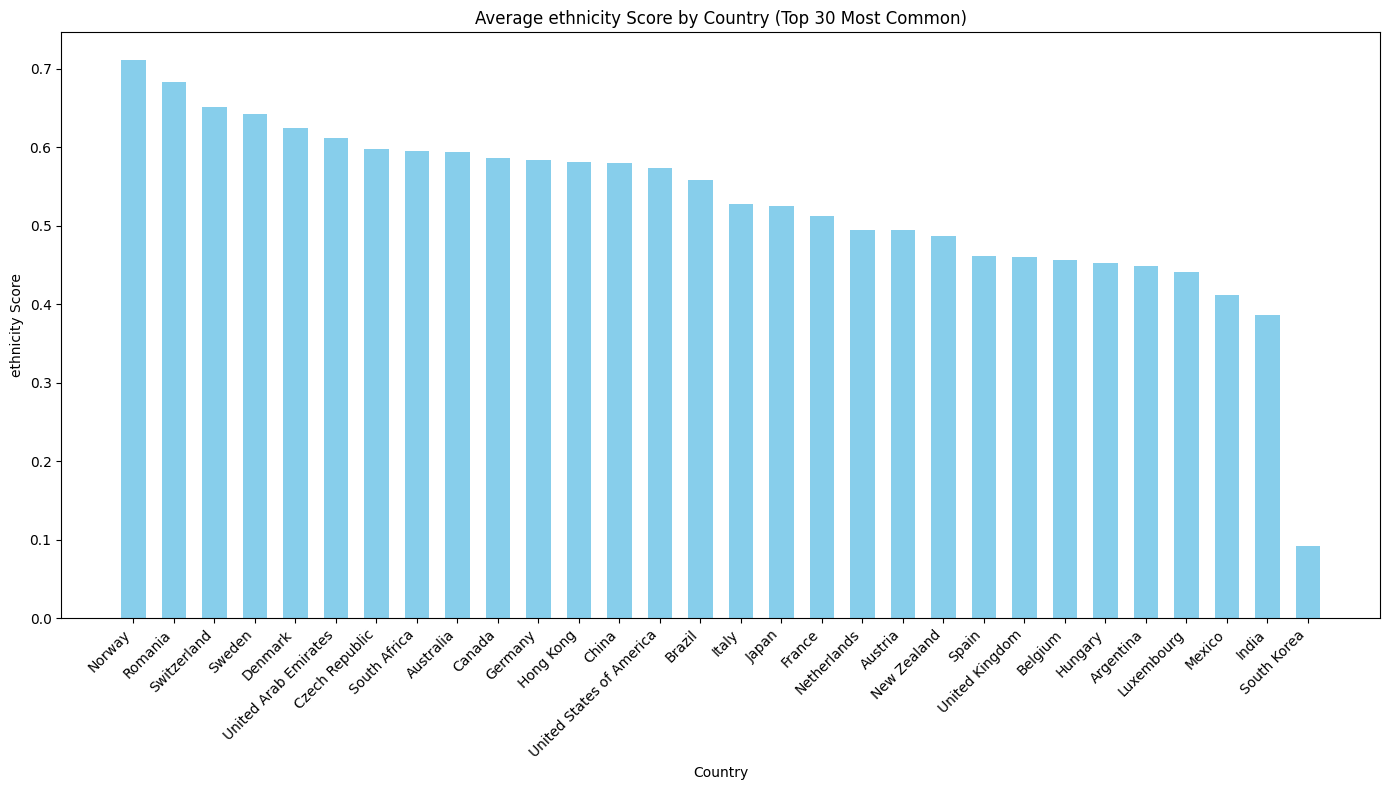

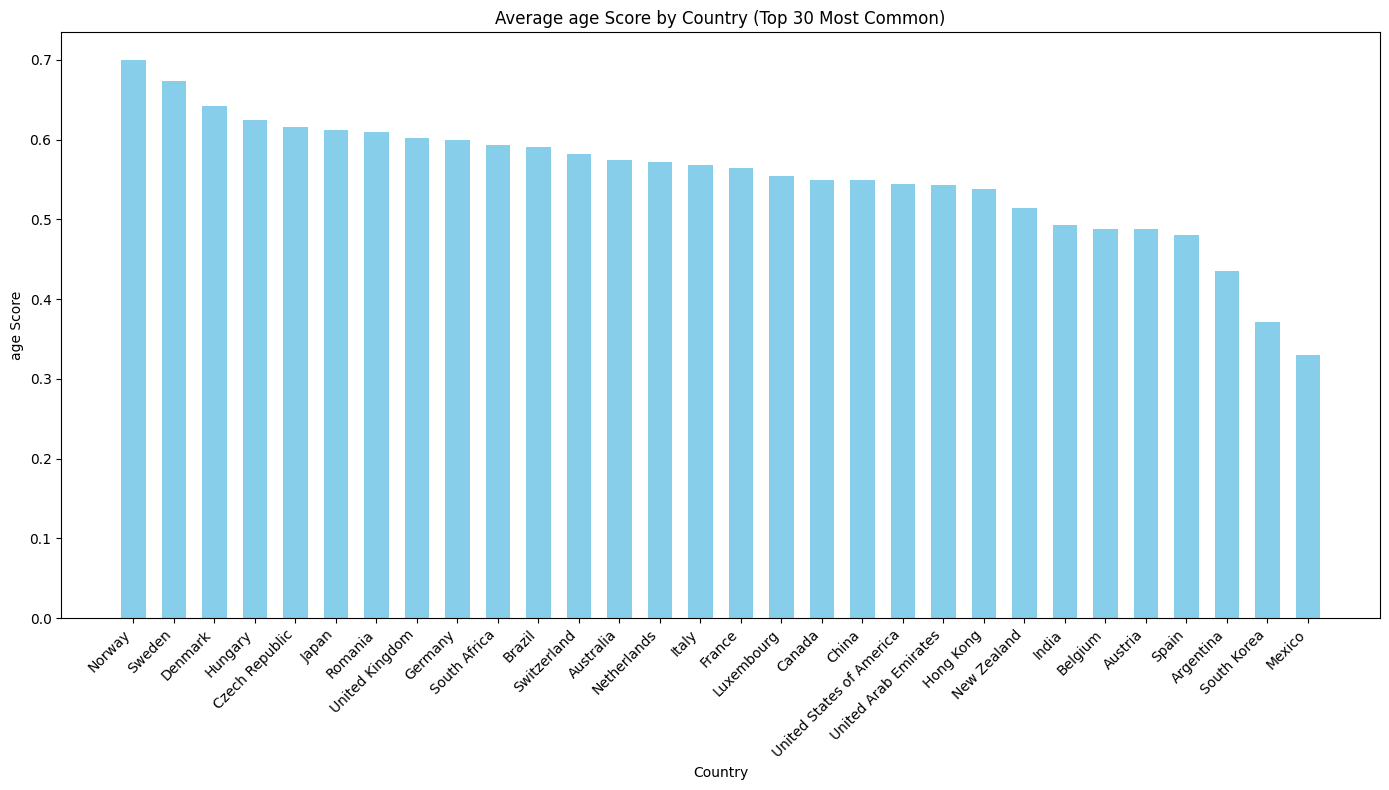

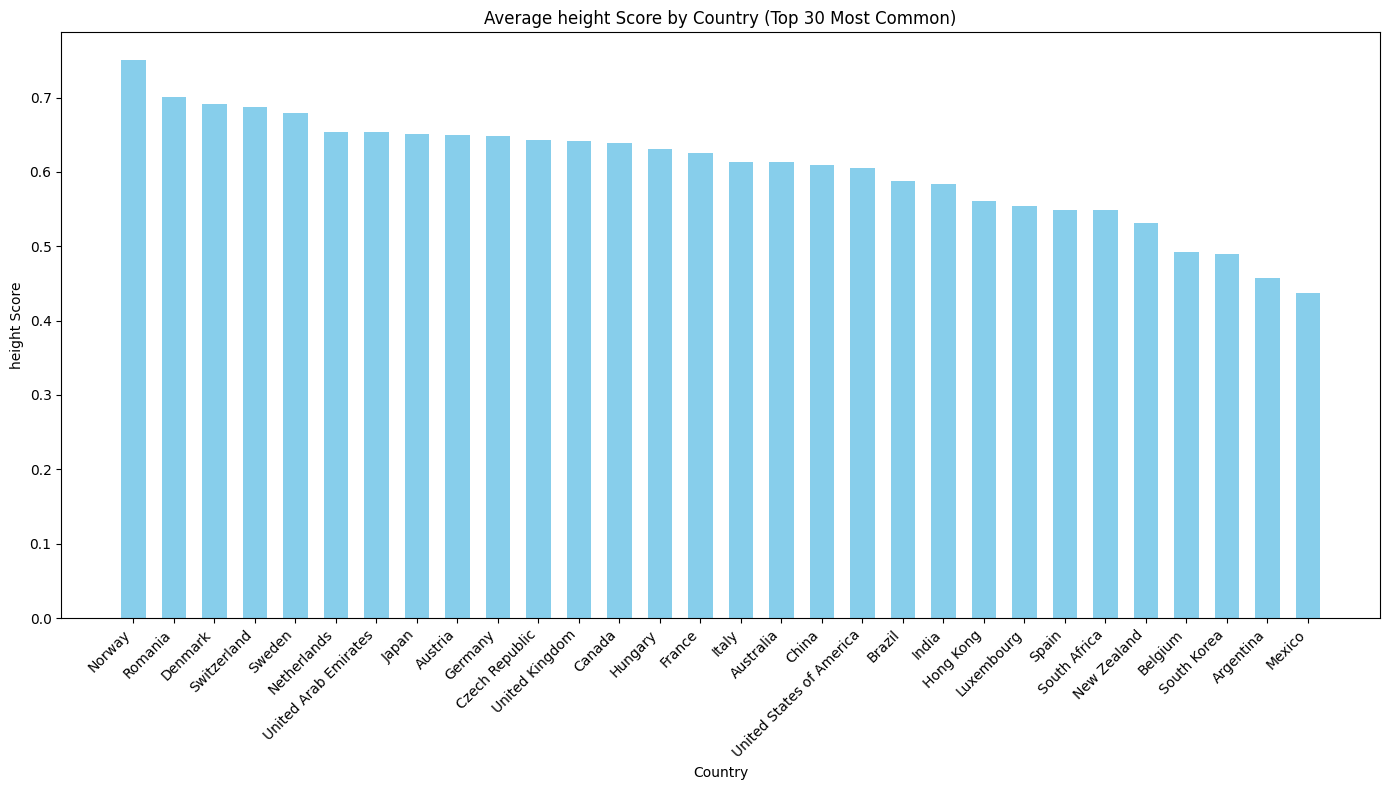

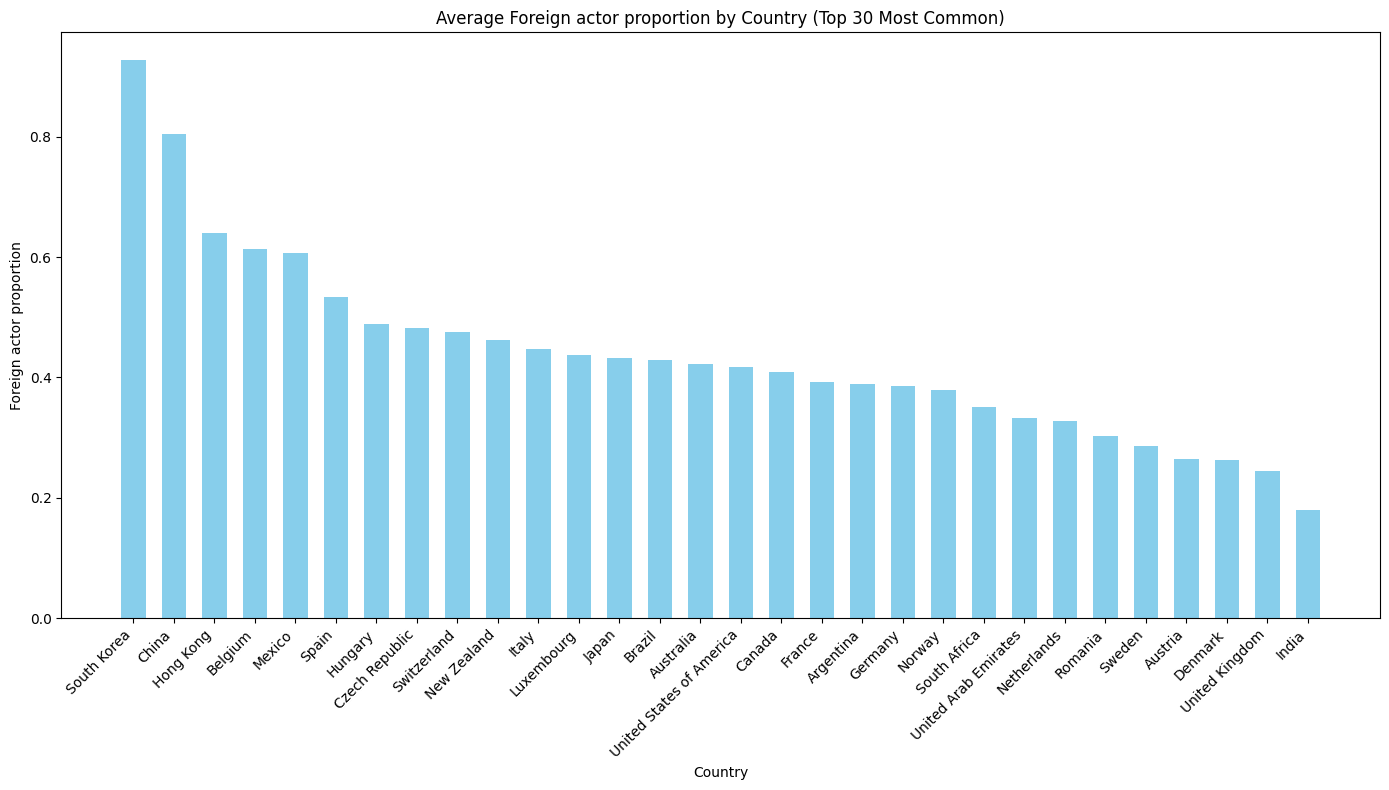

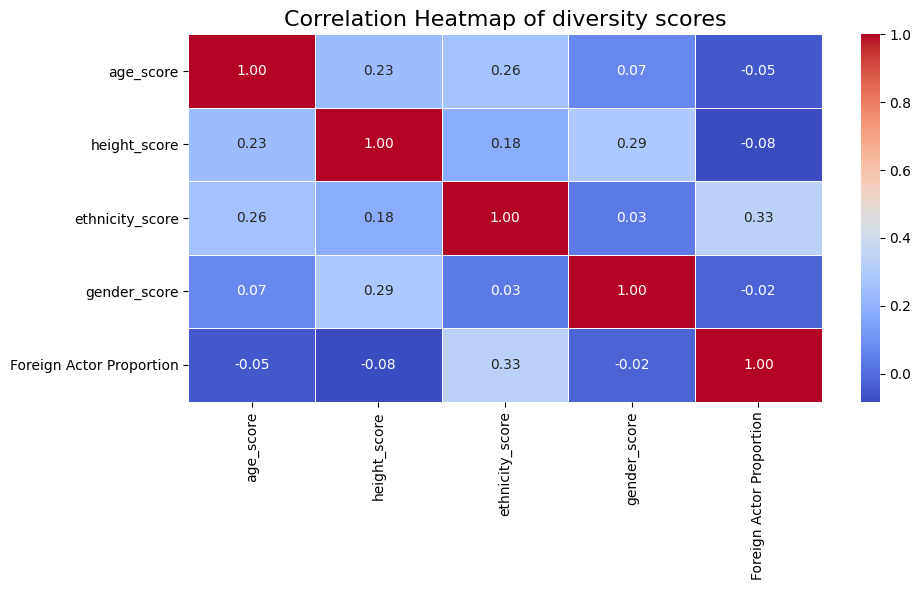

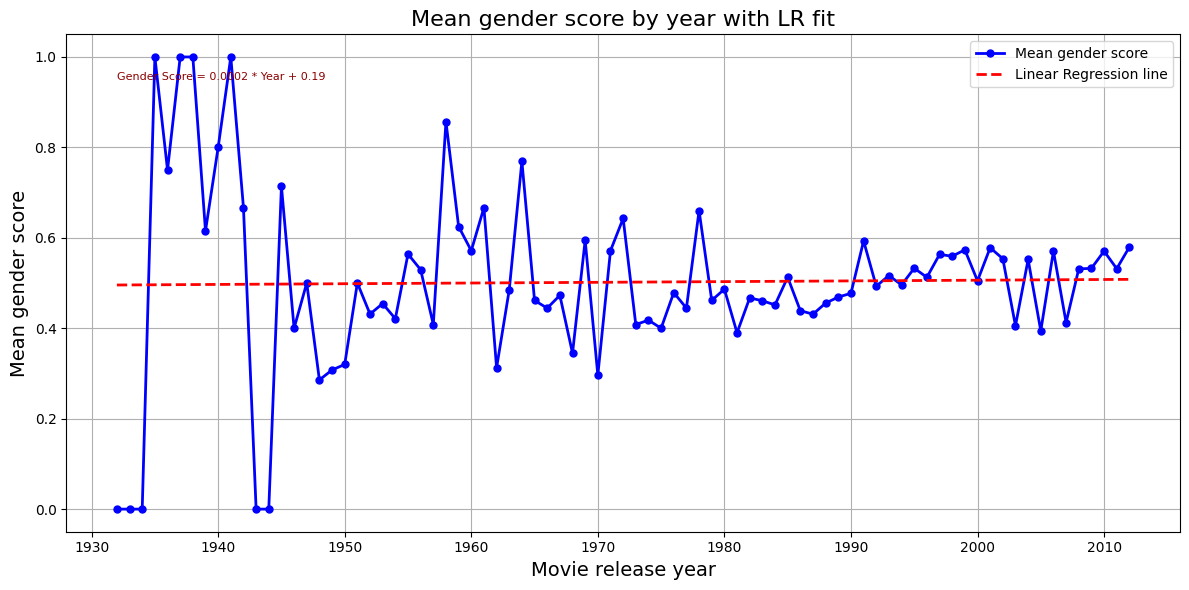

Linear regression coefficient: 0.0001558125684149603
Linear regression intercept: 0.19462141017171586


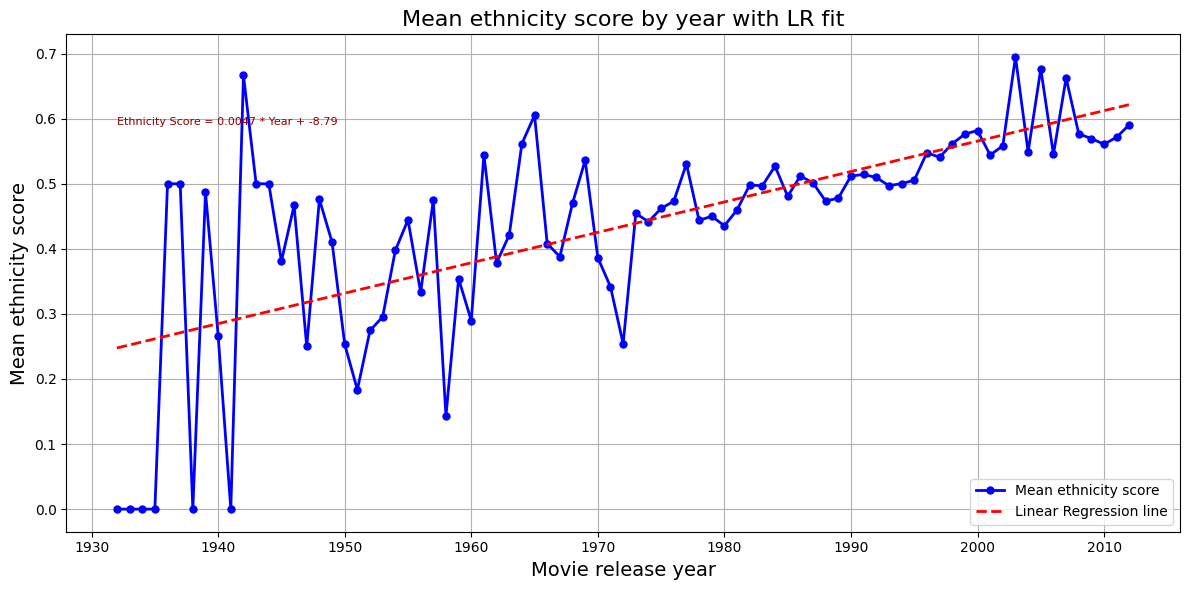

Linear regression coefficient: 0.004675479527826587
Linear regression intercept: -8.785368513644572


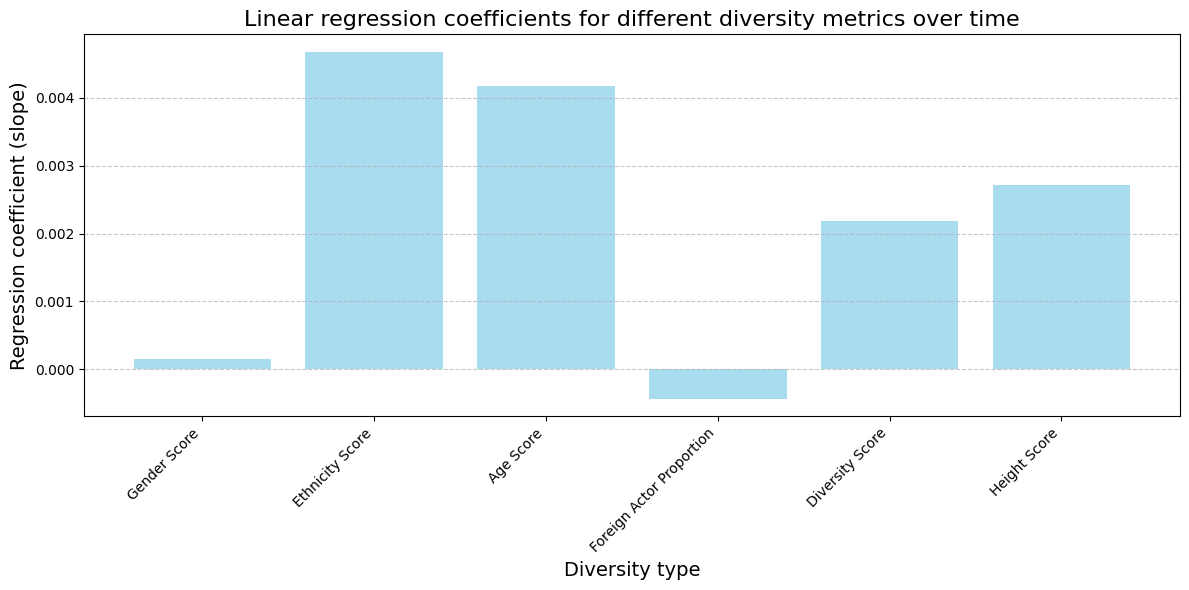

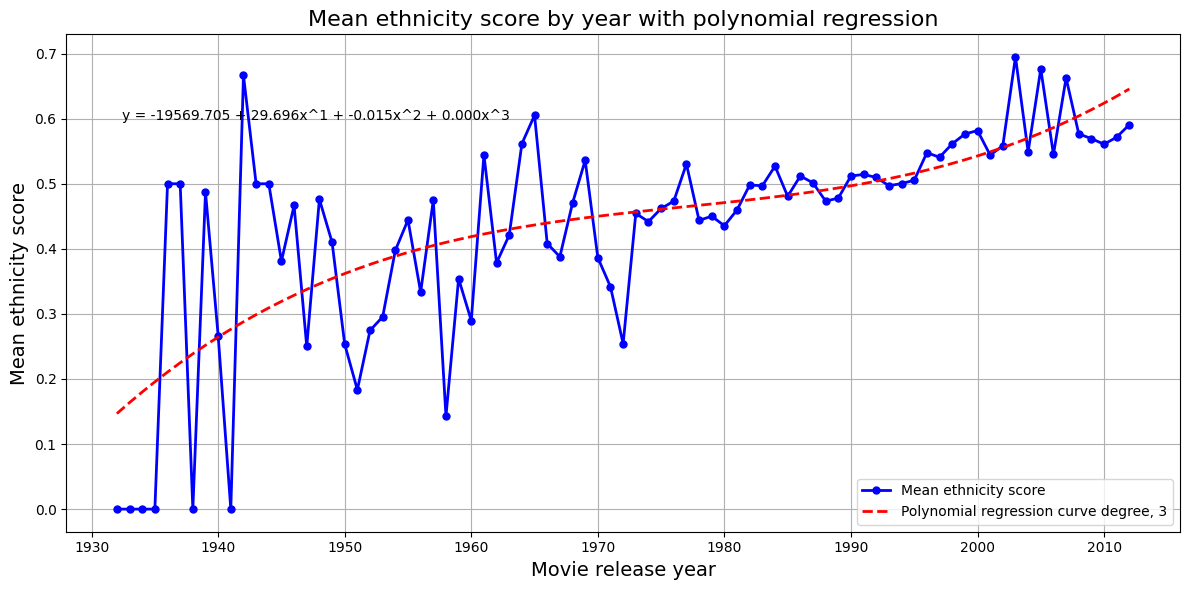

Polynomial regression coefficients: [ 0.00000000e+00  2.96958009e+01 -1.50211653e-02  2.53291335e-06]
Polynomial regression intercept: -19569.704509686453


c:\Users\antea\anaconda3\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


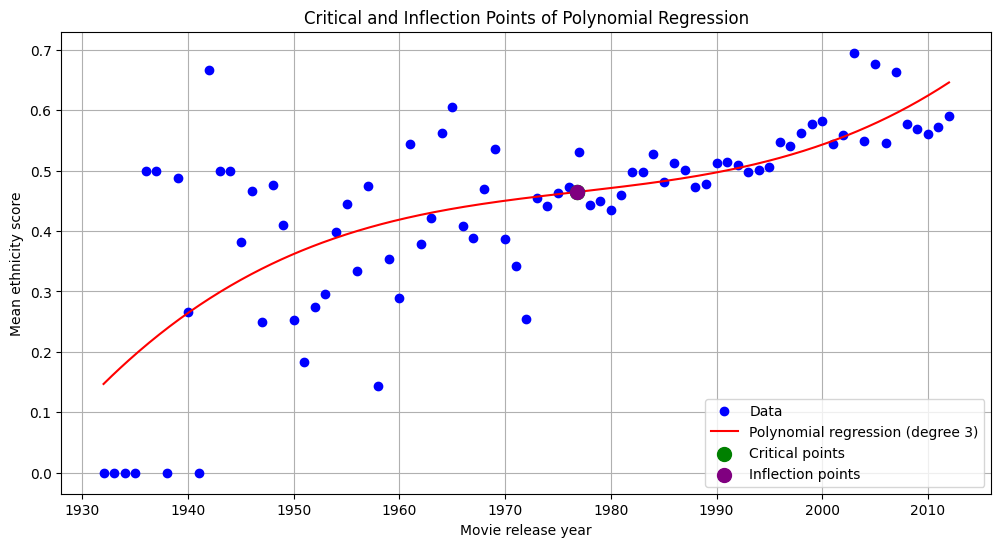

Critical Points (x values): [1976.7968407+16.25881628j 1976.7968407-16.25881628j]
Inflection Points (x values): [1976.7968407]


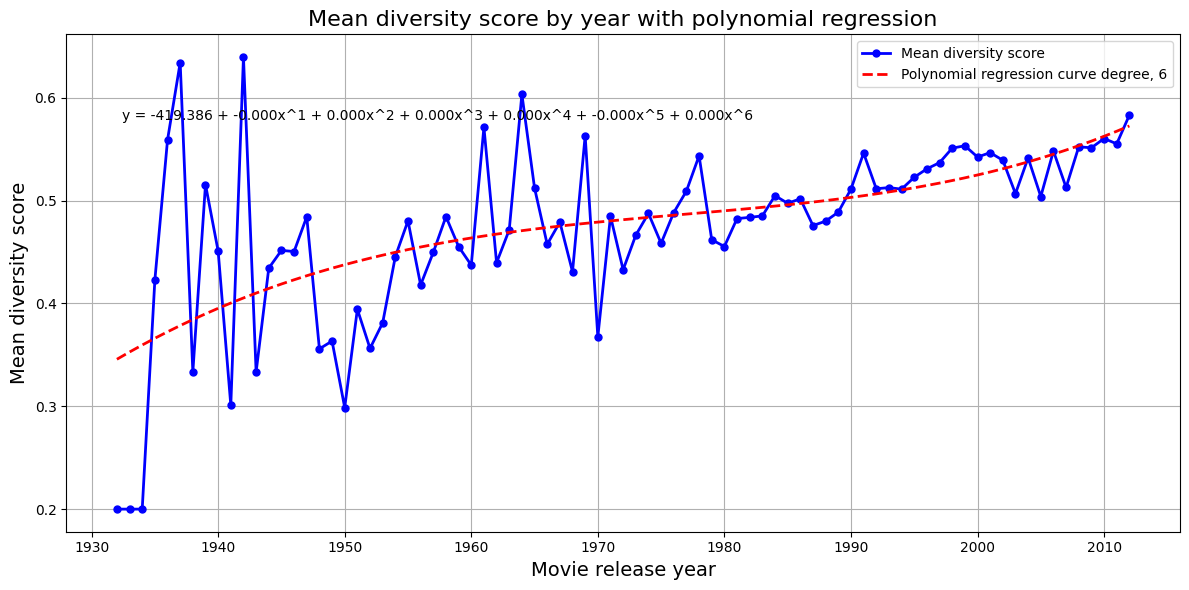

Polynomial regression coefficients: [ 0.00000000e+00 -6.49326992e-16  3.17567236e-16  4.69661387e-13
  4.11634669e-10 -3.33080060e-13  7.01924055e-17]
Polynomial regression intercept: -419.38550613758645


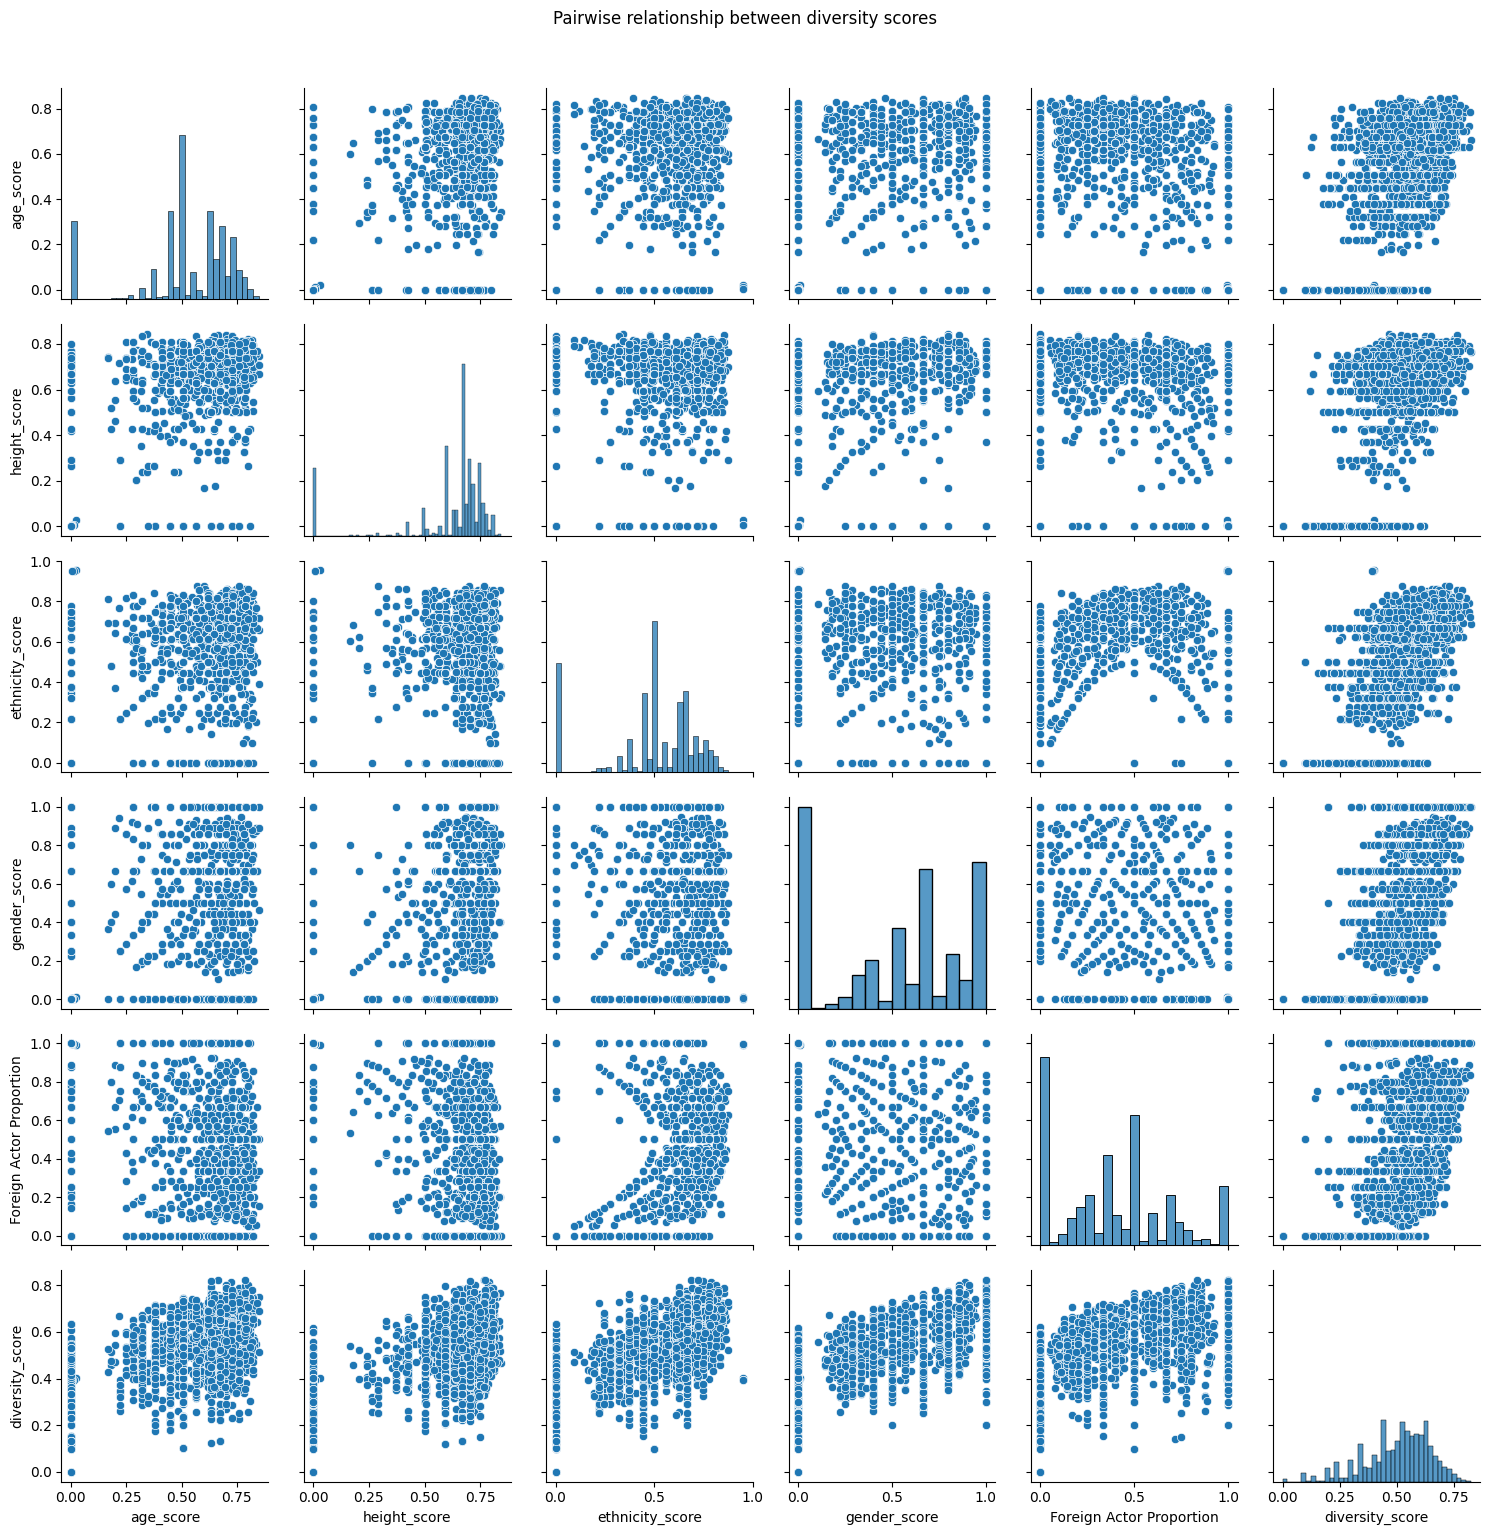

In [2]:
import src.scripts.plot_diversity_country_time

### 3.2. Causal analysis: diversity influence on box office revenues

1.7647161320256848
Pearson correlation: 0.11977516603134143
P-value: 3.2786336281940852e-80


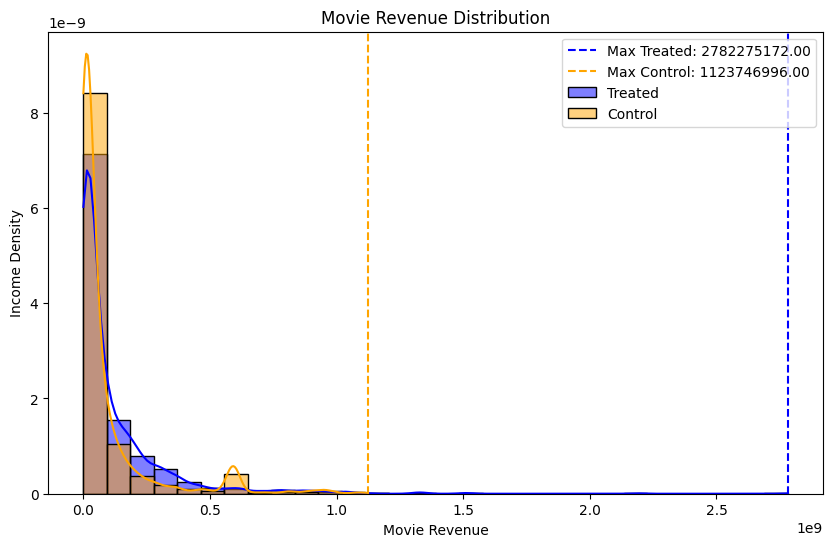

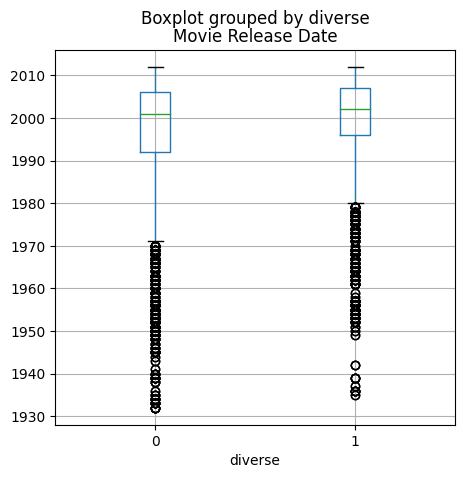

Number of movies that include English: 12356


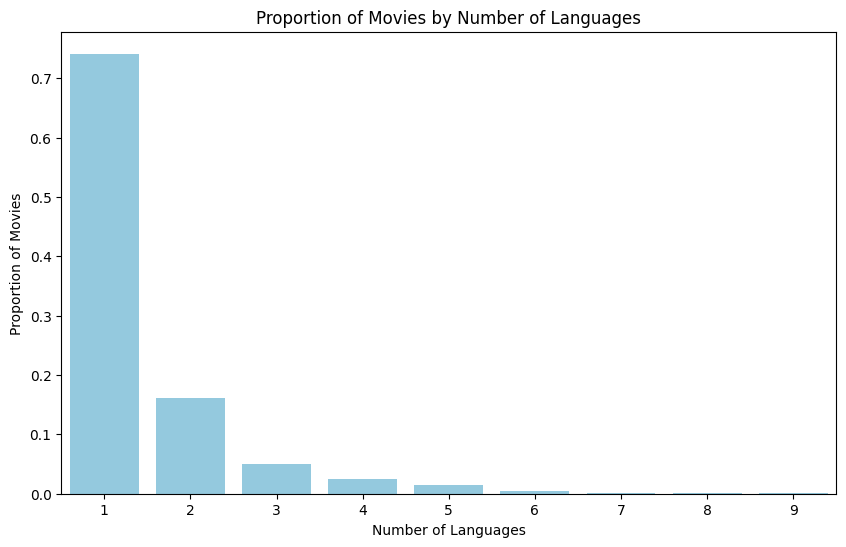

Number of movies that include English: 12236


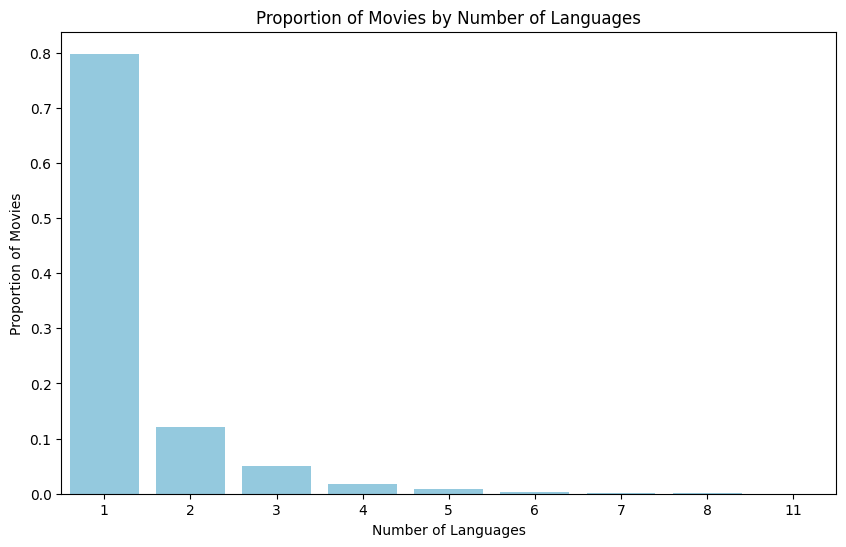

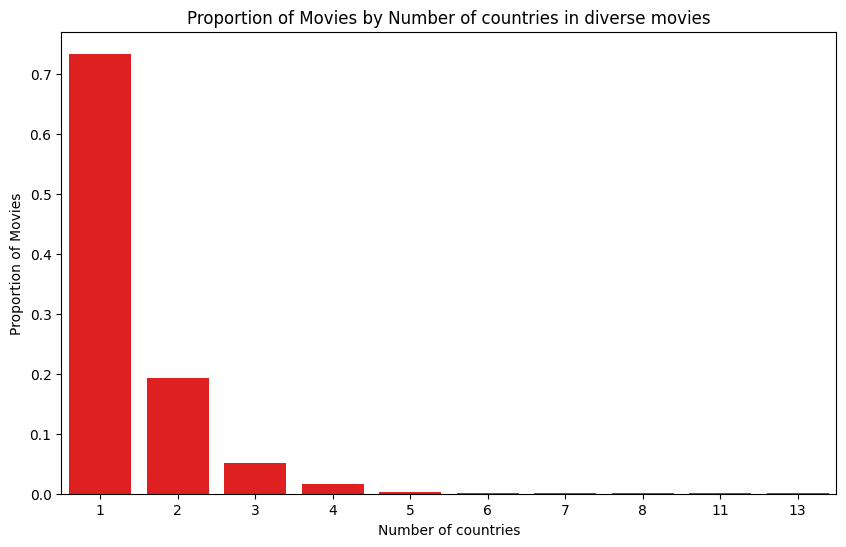

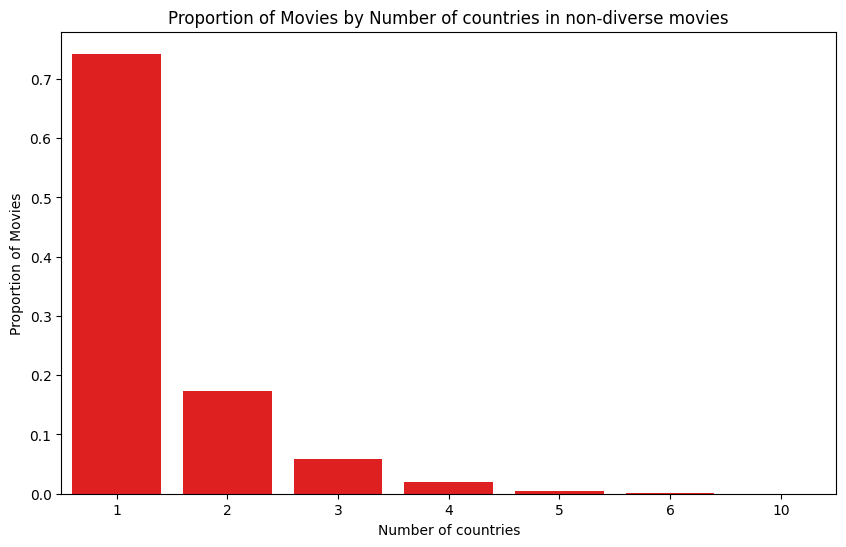

Optimization terminated successfully.
         Current function value: 0.681115
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                diverse   No. Observations:                24895
Model:                          Logit   Df Residuals:                    24890
Method:                           MLE   Df Model:                            4
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                 0.01736
Time:                        19:02:02   Log-Likelihood:                -16956.
converged:                       True   LL-Null:                       -17256.
Covariance Type:            nonrobust   LLR p-value:                2.519e-128
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -1.2168      0.135     -9.008  

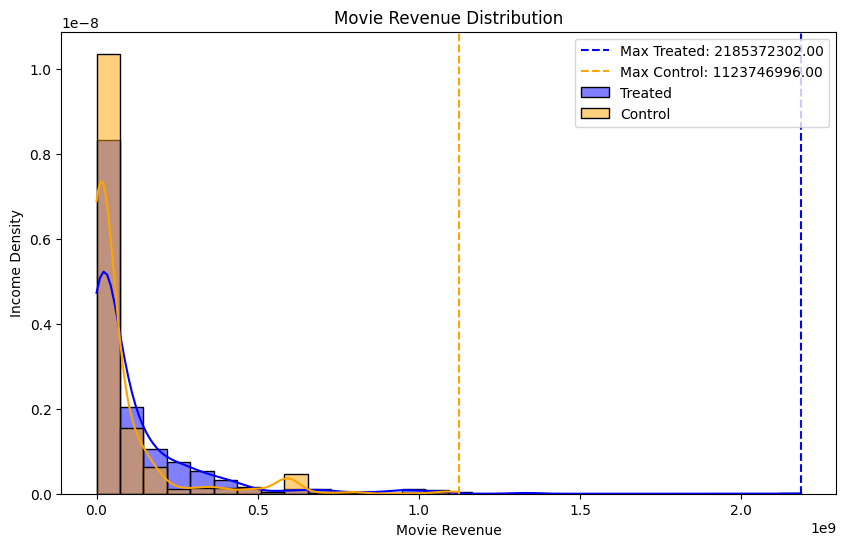

Pearson correlation: 0.127992716227069
P-value: 6.74372122546214e-12
   Gamma  Lower Bound  Upper Bound
0    1.0     1.764716     1.764716
1    1.5     1.176477     2.647074
2    2.0     0.882358     3.529432
3    2.5     0.705886     4.411790
4    3.0     0.588239     5.294148
5    5.0     0.352943     8.823581
6   10.0     0.176472    17.647161


In [7]:
import src.scripts.Causal

### Residual regression

Here we will run a residual regression. For this we construtcted a data Matrix X containing:\
- dummy variable for Movie Genres, Movie Languages and Movie Counries.\
- numerical variables contained in Movie Metadata.\
- the different diversities scores.\
\
We tried to add column by taking the square values, cosinus, exponential and log, and also by adding interacting between different columns. This always resulted in severe overfitting even with LASSO regression, hence we didn't pursued this approach more.\
\
The target y was the log of the downscaled Box office revenue.\
\
We still had to do variable selection to avoid colinearity and select only important selection. For this we implemented a LASSO CV algorithm. This permitted to obtain a set of columns on which we implemented the Residual Regression. \





Lasso was used to select the variable of interest.
The Lasso coefficients are plotted as a function of the regularization strength.


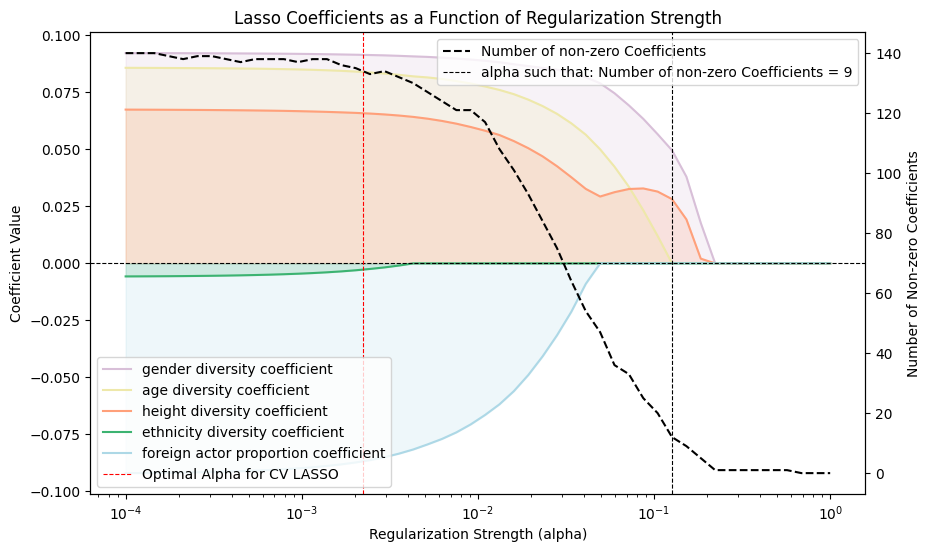

But have we really solved colinearity issues?
LASSO was unable to get rid completely of high correlations.
To solve this we propose the following: When there is a correlation > 0.4, we delete a variable.
Estimate the resiudals of the diversity scores and the Box Office Revenue on the control variables.
'''
We now can plot the residuals of the Box Office Revenue against the residuals of the diversity scores.
And obtain the summary of the regression:
                                    OLS Regression Results                                   
Dep. Variable:     Movie Box Office Revenue   R-squared (uncentered):                   0.011
Model:                                  OLS   Adj. R-squared (uncentered):              0.010
Method:                       Least Squares   F-statistic:                              9.493
Date:                      Fri, 20 Dec 2024   Prob (F-statistic):                    5.14e-09
Time:                              18:59:07   Log-Likelihood:                

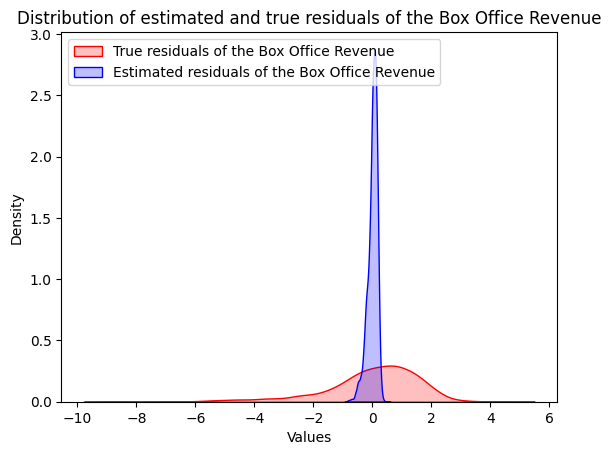

In [5]:
import src.scripts.Box_office_vs_diversity_analysis

Clearly our results are weak which suggest that there is no significant direct relation between diversities score and Boxoffice. Even if it seems that Lasso had a tendencies to keep the different diversities scores as variables.

To assess how well our model is adapted to the data we looked at the qq plot of the final residuals and plotted the final residuals against the different variables.\
These plots showed maybe a slight lack of normality as well as maybe some heteroscedasticity (It seems that the variance/spread of the final residuals was increasing with regard to Movie Release Date)

In [ ]:
    #qq plot
# src.scripts.Box_office_vs_diversity_analysis.plot_residuals_vs_fitted()

    #final residuals against columns
# src.scripts.Box_office_vs_diversity_analysis.residuals_against_columns()

### 3.3. Results of the archetype analysis

In [5]:
!pip install bar_chart_race
import src.scripts.archetype_gender_and_ethnicity

  Using cached bar_chart_race-0.1.0-py3-none-any.whl.metadata (4.2 kB)
Using cached bar_chart_race-0.1.0-py3-none-any.whl (156 kB)


ValueError: Invalid frequency: YE

In [ ]:
from IPython.display import Video 

#path to .mp4 file 
video_path = 'src/data/archetype_bar_chart_race.mp4'

#display video
Video(video_path, width=800, height=400)

### 3.4. Causal analysis: archetypes influence on box office revenues

## 4. Conclusions
We observed that the diversity scores in all categories have gone up since the 1940s except for the Foreign Actor Proportion.It seems that the cause of the linear regression in gender score being flat is due to low data in early movies.  We observed that various countries  have different average scores, and that some perform in certain categories. Some countries like UAE are very diverse ethnically, but less diverse gender wise while some countries like Austria have higher gender diversity but low ethnic diversity